ZOMATO  RESTAURANT PREDICTION

Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of restaurants.

Objective

To predict-
1) Average Cost for two- Build a predictive regression model to predict the average cost of 2 customers dining/ordering.
2) Price range- Build a predictive classification model to predict the range


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data
df1=pd.read_csv("https://raw.githubusercontent.com/Mishra35nivedita/Internship/main/Evaluation%20Project-Third%20Phase/zomato.csv")

In [3]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df2=pd.read_csv("https://raw.githubusercontent.com/Mishra35nivedita/Internship/main/Evaluation%20Project-Third%20Phase/Country-Code.csv")

In [5]:
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
data=pd.merge(df1,df2)

In [7]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
#Checking random samples
data.sample(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
336,17060869,Texas de Brazil,216,Orlando,"5259 International Drive, Orlando, FL 32819",I-Drive/Universal,"I-Drive/Universal, Orlando",-81.451072,28.467681,"Brazilian, Steak",...,No,No,No,No,4,4.6,Dark Green,Excellent,2324,United States
8735,1745,Southern Treat,1,Noida,"B-1/32, Central Market, Sector 50, Noida",Sector 50,"Sector 50, Noida",77.362097,28.570351,South Indian,...,No,Yes,No,No,2,2.8,Orange,Average,113,India
2050,18277212,Cyber Adda 24,1,Gurgaon,"Unit 1-A, Ground Floor, Weldone Tech Park, Nea...",Sohna Road,"Sohna Road, Gurgaon",77.038380,28.418352,"North Indian, Chinese, Fast Food",...,No,No,No,No,2,3.3,Orange,Average,17,India
2358,2300061,Hucka,1,Kanpur,"3rd Floor, SGM Plaza, Arya Nagar, Kanpur",Arya Nagar,"Arya Nagar, Kanpur",80.320708,26.483672,"Chinese, Fast Food",...,No,No,No,No,2,3.3,Orange,Average,148,India
8252,18216939,China Leaf,1,Noida,"Shop 17, Ashirwad Complex, Sector 104, Near, S...",Sector 110,"Sector 110, Noida",77.366273,28.539289,"Chinese, Thai",...,No,Yes,No,No,2,3.7,Yellow,Good,115,India
7349,483,Moti Mahal Delux- Legendary Culinary,1,New Delhi,"E-31/32, South Extension 2, New Delhi",South Extension 2,"South Extension 2, New Delhi",77.219543,28.568234,"North Indian, Mughlai, Chinese",...,Yes,Yes,No,No,3,3.6,Yellow,Good,177,India
5659,18471235,Aditya Da Vaishno Dhaba,1,New Delhi,"Arjun Park, Near Metro Pillar 58, Najafgarh, N...",Najafgarh,"Najafgarh, New Delhi",77.012198,28.618064,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,India
6864,18440160,Chawla Chik Inn,1,New Delhi,"Shop 1, Tiger Lane, Western Avenue, Sainik Far...",Sainik Farms,"Sainik Farms, New Delhi",77.214375,28.507952,"North Indian, Mughlai",...,No,Yes,No,No,2,0.0,White,Not rated,0,India
1167,7076,Yo! Dimsum,1,Gurgaon,"Ground Floor, Ansal Plaza Mall, Palam Vihar, G...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511506,Chinese,...,No,No,No,No,1,3.0,Orange,Average,10,India
1641,8651,Baskin Robbins,1,Gurgaon,"2-H, Commercial Complex, Opposite Ansal Celebr...",Palam Vihar,"Palam Vihar, Gurgaon",77.037900,28.512553,Ice Cream,...,No,No,No,No,1,3.1,Orange,Average,14,India


In [157]:
#Checking size/shape of data
data.shape

(9551, 22)

In [14]:
#Checking all columns
list(data.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [16]:
#Checking data type and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Most of the columns in the dataset have object type data.Currency
Columns like Restaurant Name, City, Address, Locality, Locality Verbose, Cuisines, Currency, Has Online delivery, Is delivering now,Switch to order menu,Rating color and Country have object type data and remaining columns have integer and float data type values.

There are no null values in any of the columns.

In [18]:
#Confirming nulls
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

No null values

In [19]:
#Checking unique values
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [20]:
data['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [21]:
data['Switch to order menu'].unique()

array(['No'], dtype=object)

In [24]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [25]:
data['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [8]:
#Let's drop irrelevant columns-
data.drop(columns=['Restaurant ID','Switch to order menu'], axis=1, inplace=True)

In [9]:
data.shape

(9551, 20)

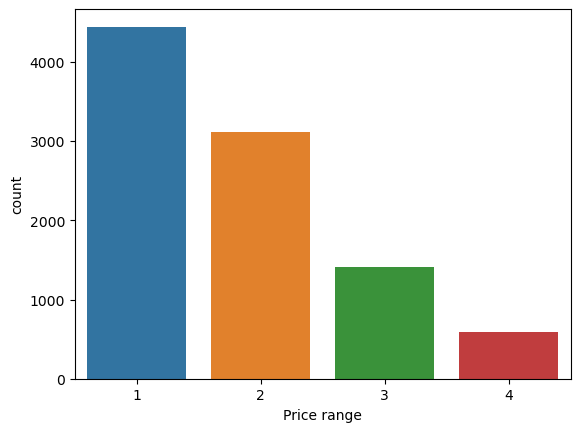

In [27]:
#Let's check distribution price range-
sns.countplot(x='Price range', data=data)
plt.show()

Price Range 1 has the highest count, followed by Price range 2, Price rang 3 and the lowest count is for price range 4. The distribution seems a bit imbalanced which may have to be treated at a later stage

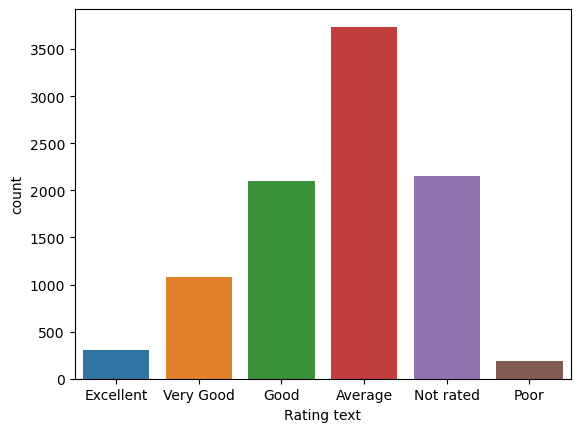

In [28]:
#Let's check how counts of rating text received by customers
sns.countplot(x='Rating text', data=data)
plt.show()

Most customers have rated the restuarants/food in the restaurant as 'Average'. A high number of customers have not rated at all. 'Poor' is the least in number in terms of rating.

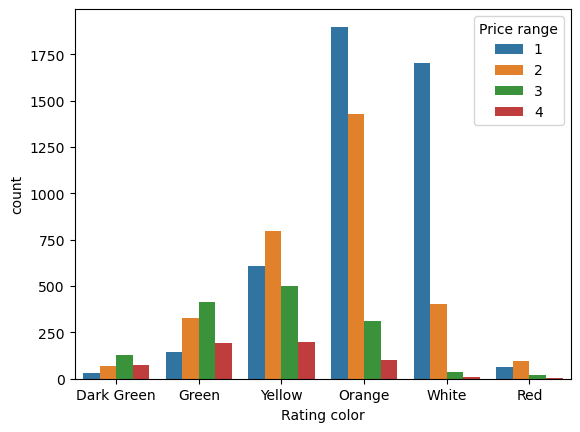

In [39]:
#Let's check rating color count with respect to pricec range-
sns.countplot(x='Rating color', hue='Price range', data=data)
plt.show()

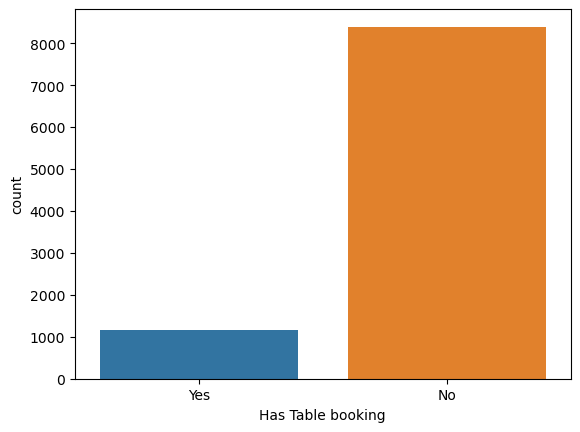

In [29]:
#Let's check count of table booking option-
sns.countplot(x='Has Table booking', data=data)
plt.show()


Most restaurants offer dining on arrival and does not give table pre-booking option.

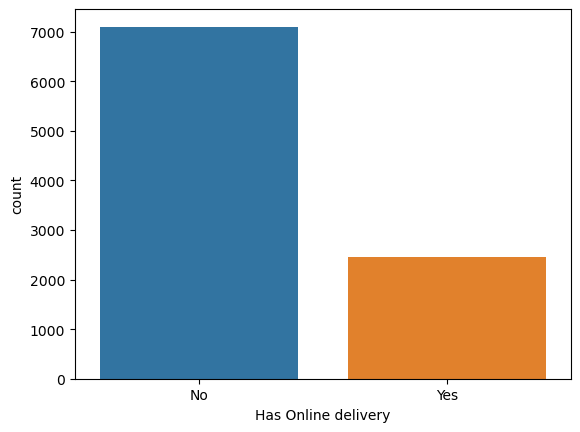

In [30]:
#Let's check count of online delivery option-
sns.countplot(x='Has Online delivery', data=data)
plt.show()

Most restaurants provide food service on dining only and are not open to online delivery option.

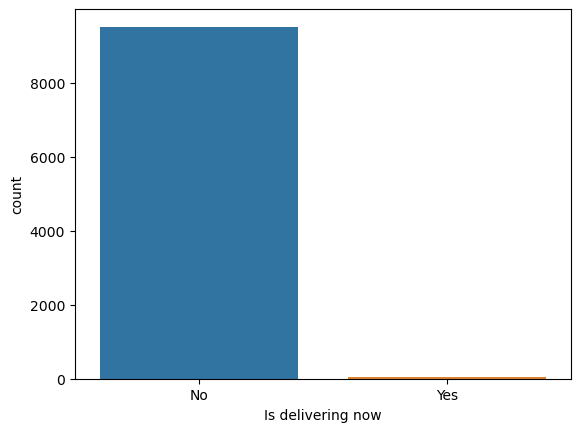

In [37]:
#Let's check current delivery option-
sns.countplot(x='Is delivering now', data=data)
plt.show()

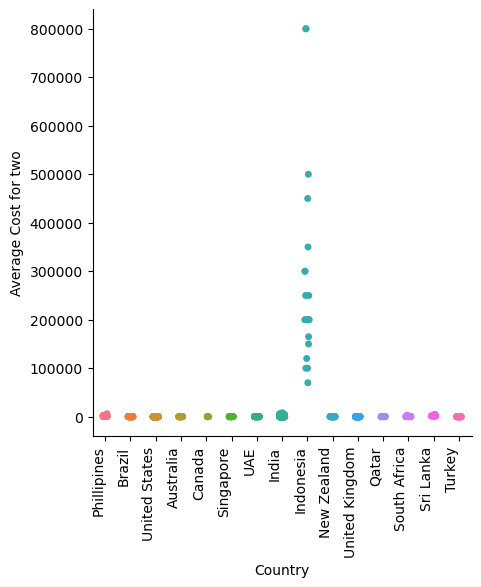

In [33]:
#Let's check average cost of two country wise
sns.catplot(x='Country', y='Average Cost for two', data=data, hue='Country')
plt.xticks(rotation=90, ha='right')
plt.show()

Average cost of two is highest in Indonesia

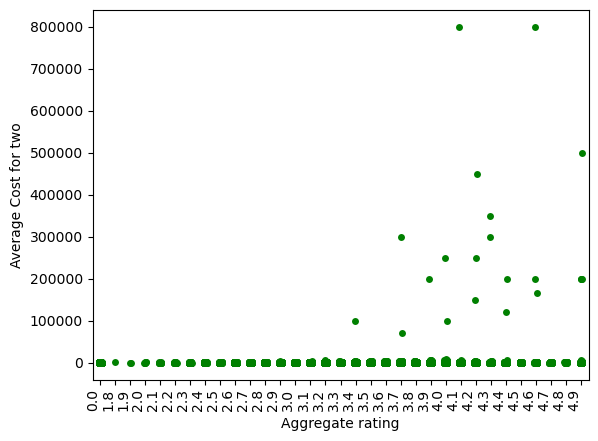

In [36]:
#Checking relationship between aggregate rating and Average cost of two
sns.stripplot(x='Aggregate rating', y='Average Cost for two', data=data, color='g')
plt.xticks(rotation=90, ha='right')
plt.show()

We see that Avergae cost for two increases with an increase in aggregate rating after3.3. Restaurants with rating between 4.2 to 4.8 have the highest average cost for two. 

In [10]:
#Encoding object data type columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [11]:
list=['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Currency','Has Online delivery','Is delivering now','Rating color','Rating text','Has Table booking','Country']

In [12]:
for i in list:
    data[i]=le.fit_transform(data[i])

In [13]:
data.dtypes

Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

All the columns now are int/float data type

In [51]:
data.describe()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


Observations-

1. There are no null values for any of the variables.

2. Range of standard deviation shows that the scale of distribution varies a lot.

3. Difference in 75% and max is high for many variables like Longitude, Cuisines etc which indicate presence of outliers.

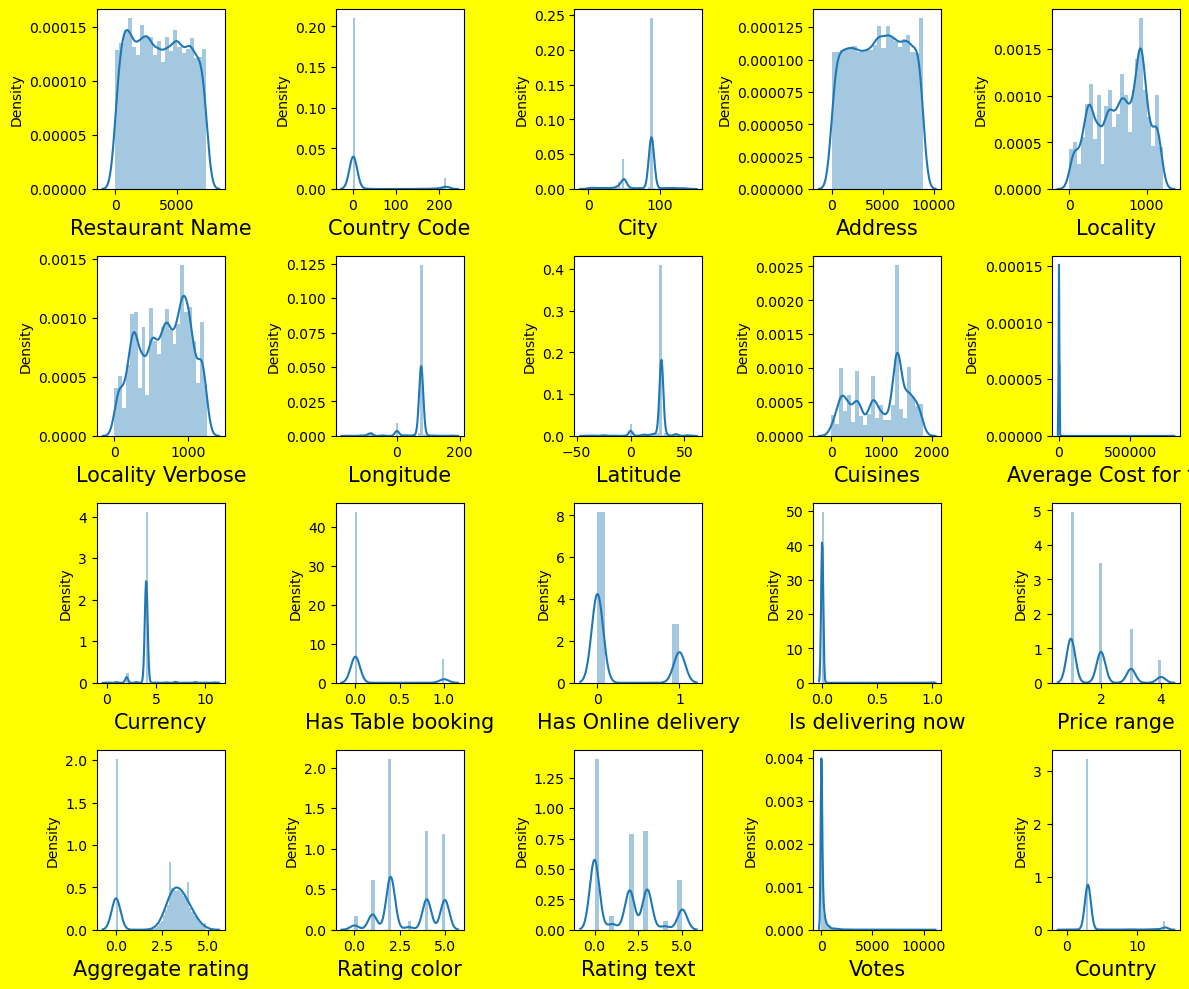

In [52]:
#let's find out more about the distribution through graphical representatioon
plt.figure(figsize=(12,10),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()


Most of the variables like Votes, Is delivering now, Average cost for two etc are skewed to right. A lot of other variables are skewed. 

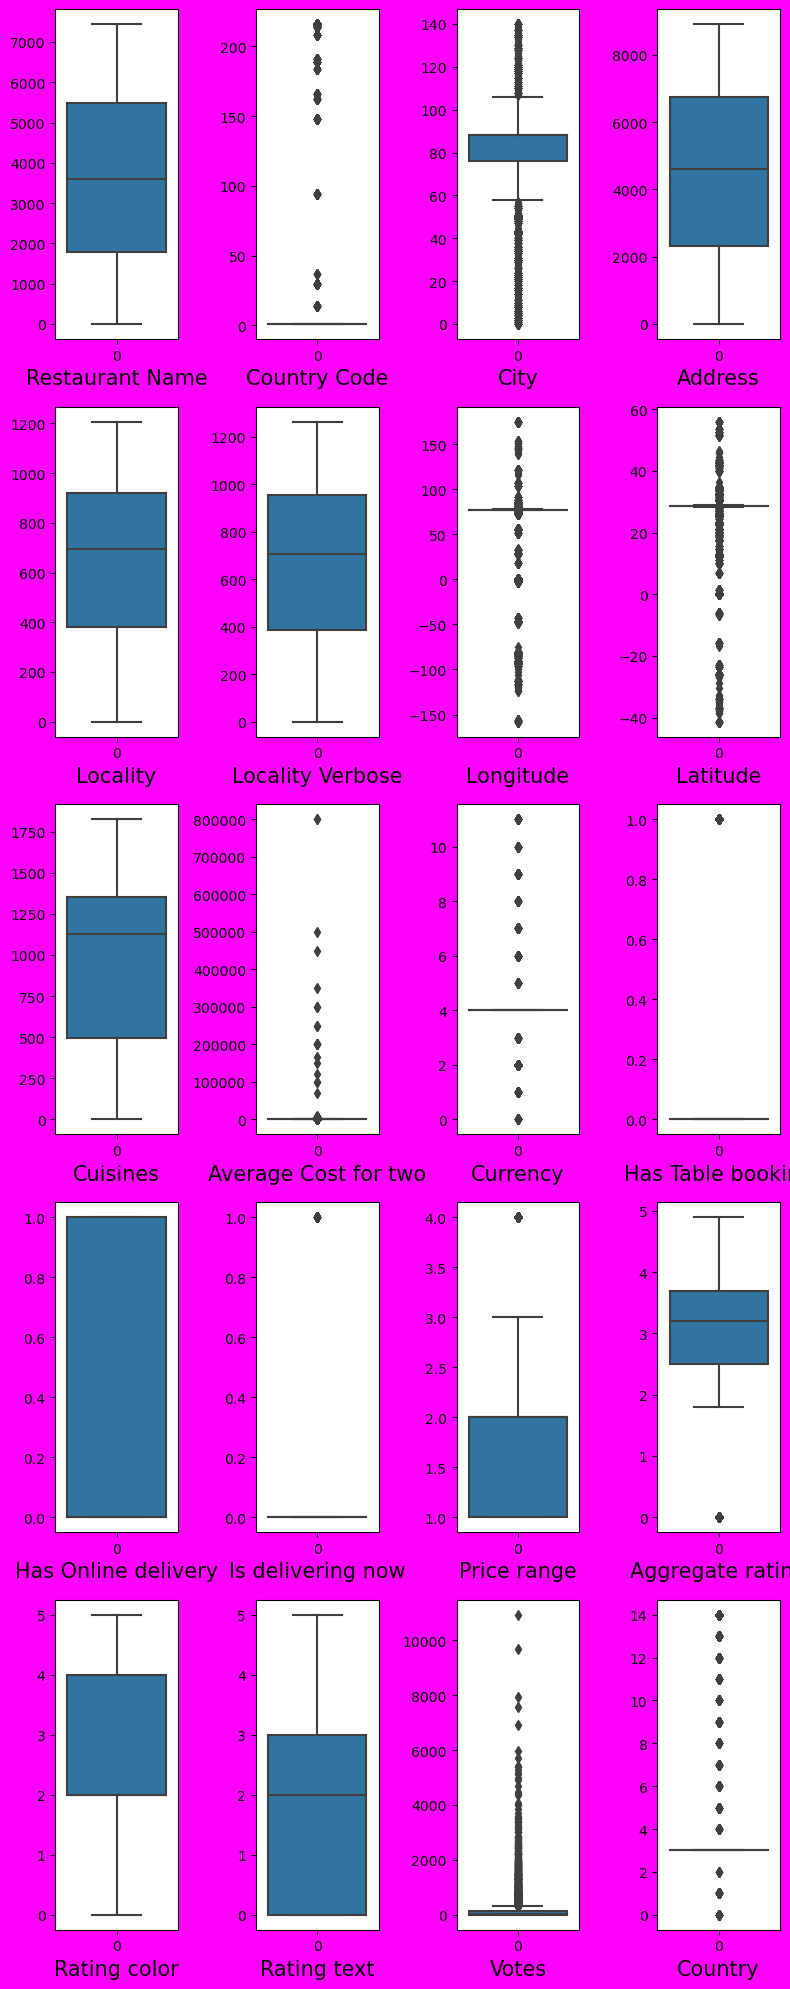

In [53]:
#Let's check for outliers
plt.figure(figsize=(8,20),facecolor='magenta')
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Variables like Country code, City, Longitute, Latitude, Average Cost for two, Currency, Has Table booking, Aggregate rating, Votes and Country have outliers.
Rest of the columns don't have outliers at all.

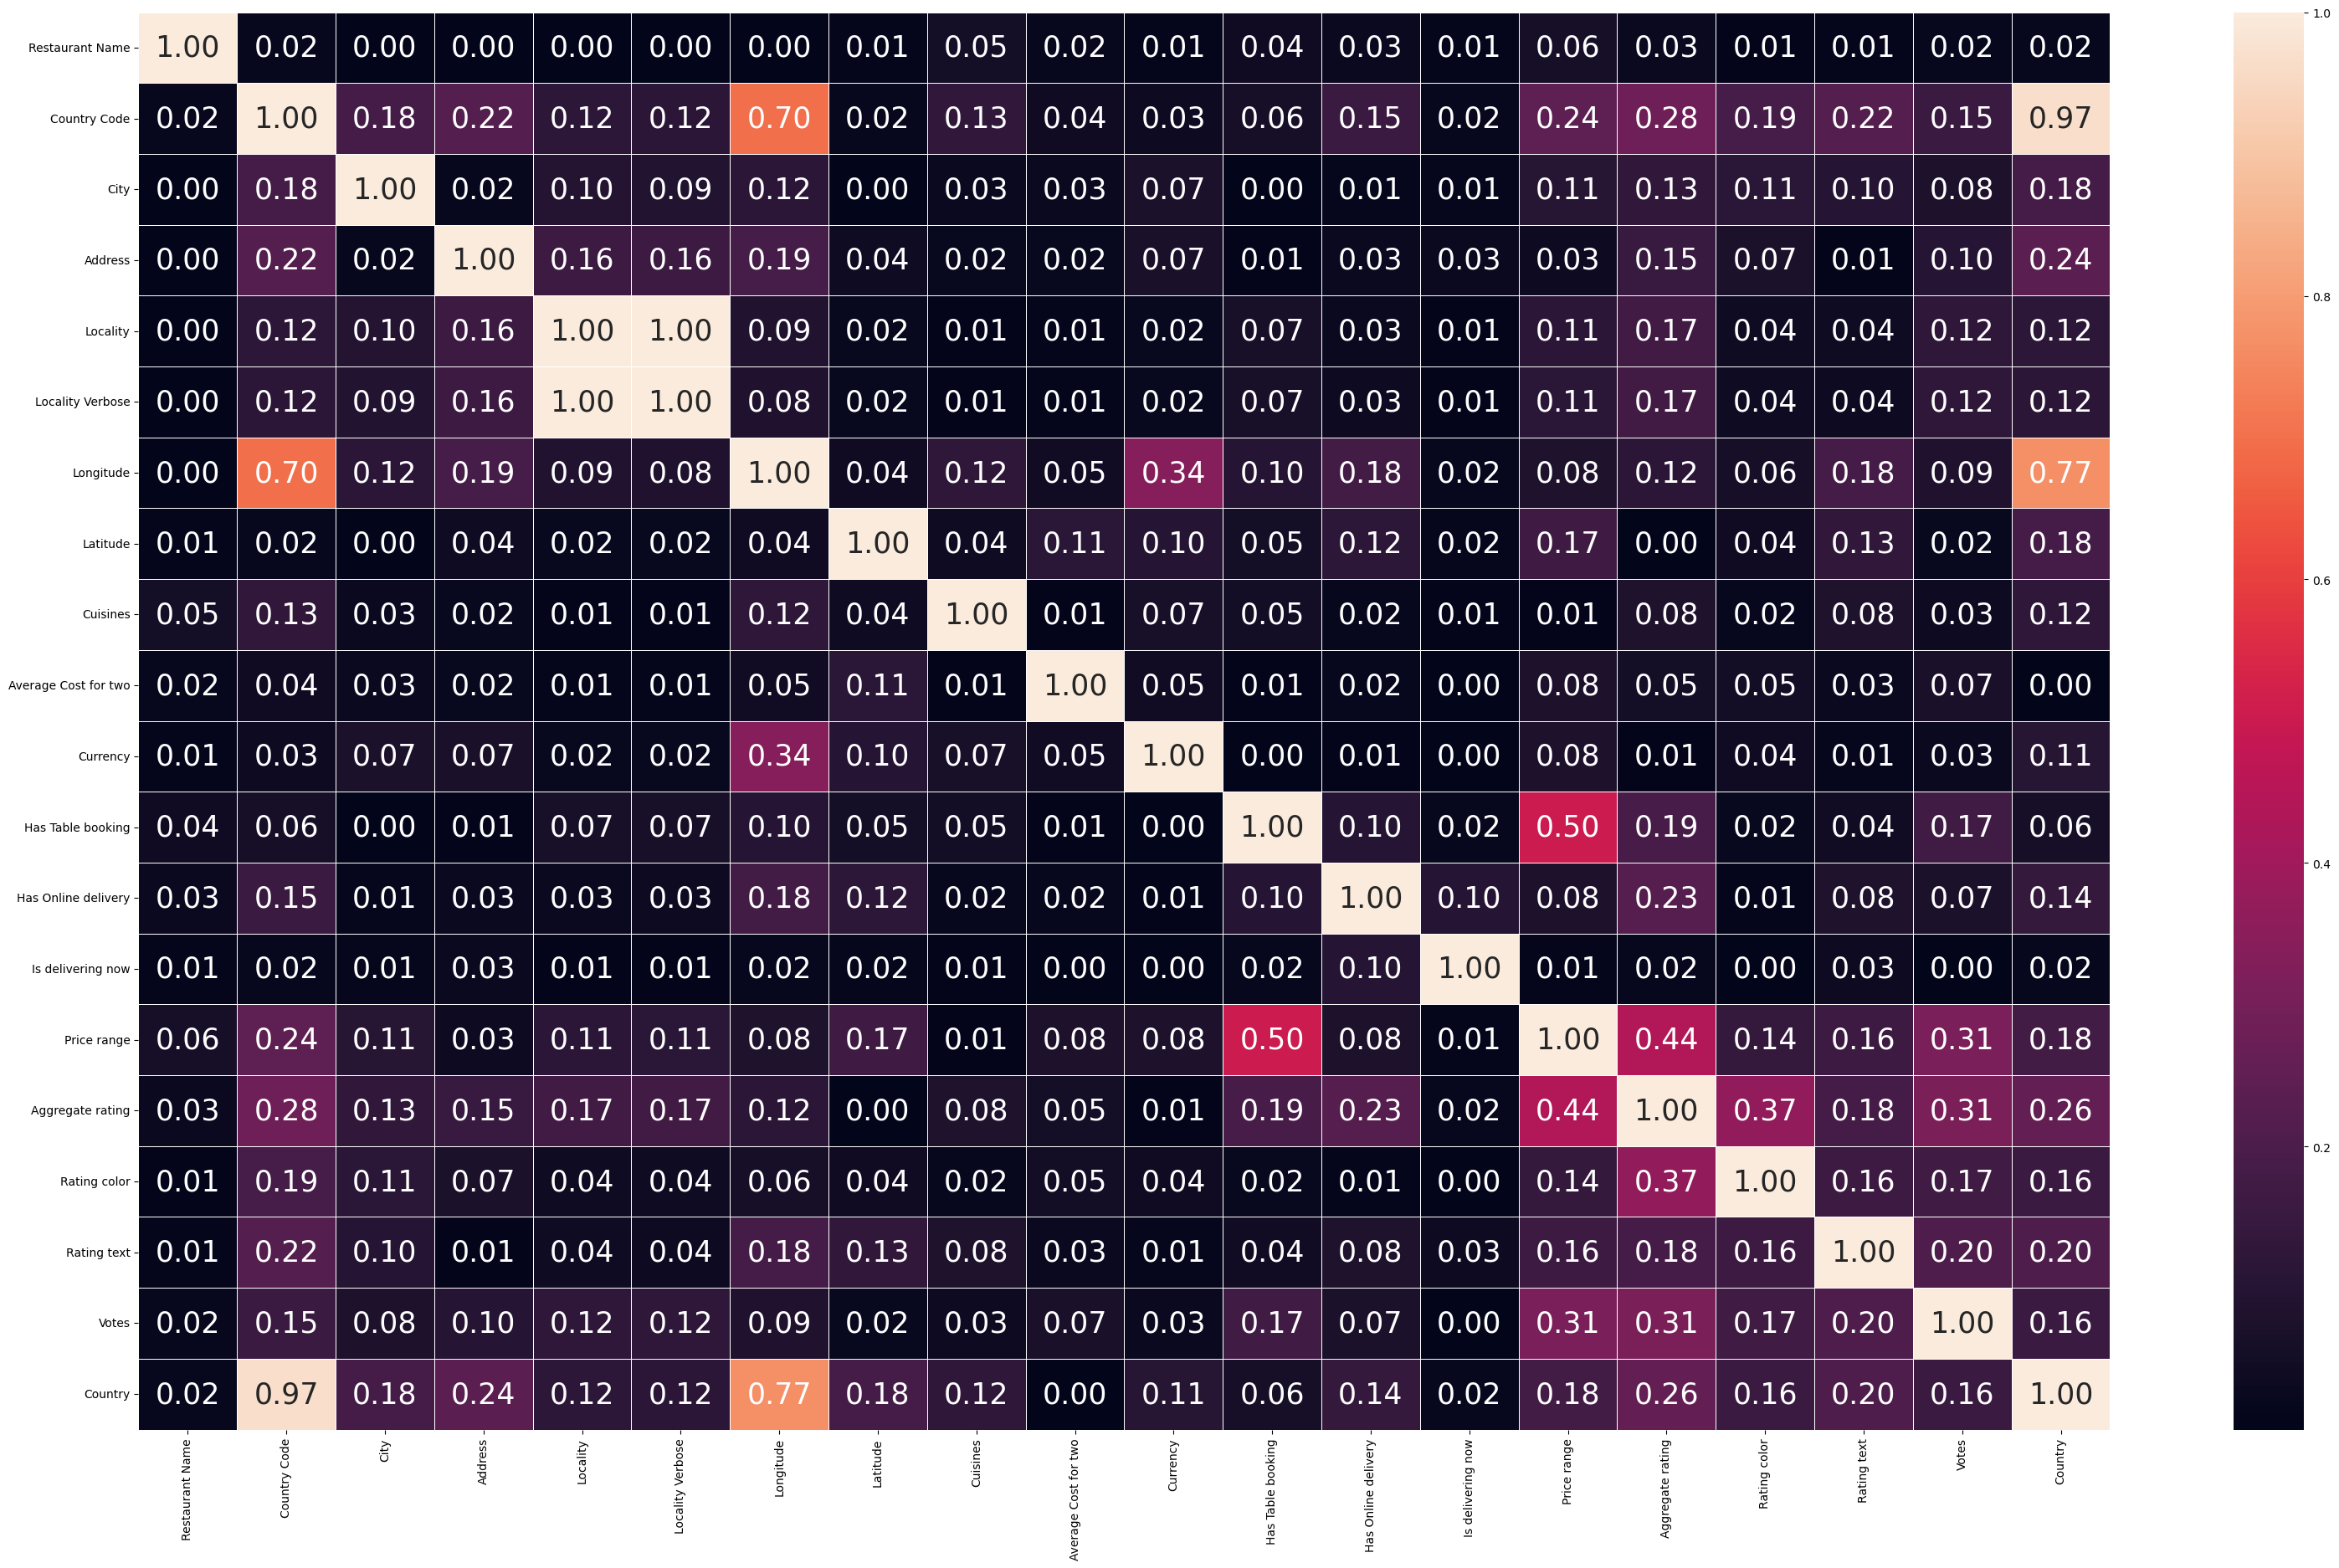

In [56]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(38,22))
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':25}, linewidth=.5)
plt.show()

Observations-

1. Country code and Country are vhighly correlated.

2. Locality and Locality Verbrose have the perfect correlation score of 1 which means they have the highest correlation among features.

3. Features like Currency and Is Delivering Now seem to be least correlated with the label Price Range. 

4. Features like Locality, Locality Verbrose, Has Table booking are leasr correlated to the label Average cost for two and features like Is delivering now and Country are not correlated at all.

In [14]:
data['price_range']=data['Price range']

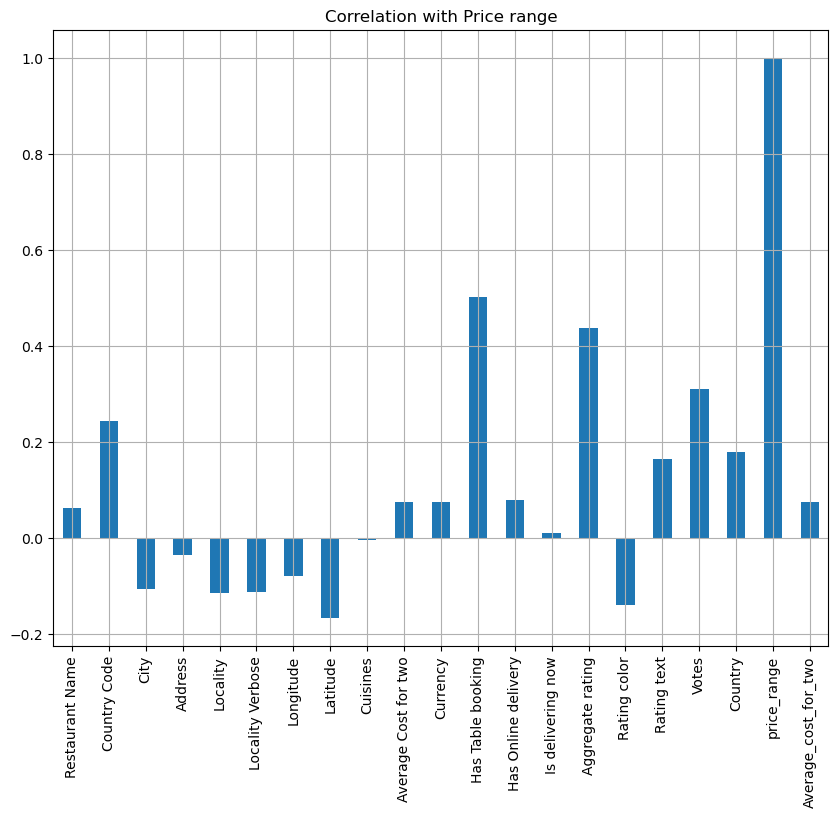

In [66]:
#Let's check the impact of each feature on the label(Primary fuel)
data.drop('Price range', axis=1).corrwith(data.price_range).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Price range')
plt.show()

In [15]:
data.corr()["price_range"].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Locality               -0.114460
Locality Verbose       -0.112314
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005489
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
price_range             1.000000
Name: price_range, dtype: float64

Cuisines and Is delivering now are least contributors for determining label Price range.

In [15]:
data['Average_cost_for_two']=data['Average Cost for two']

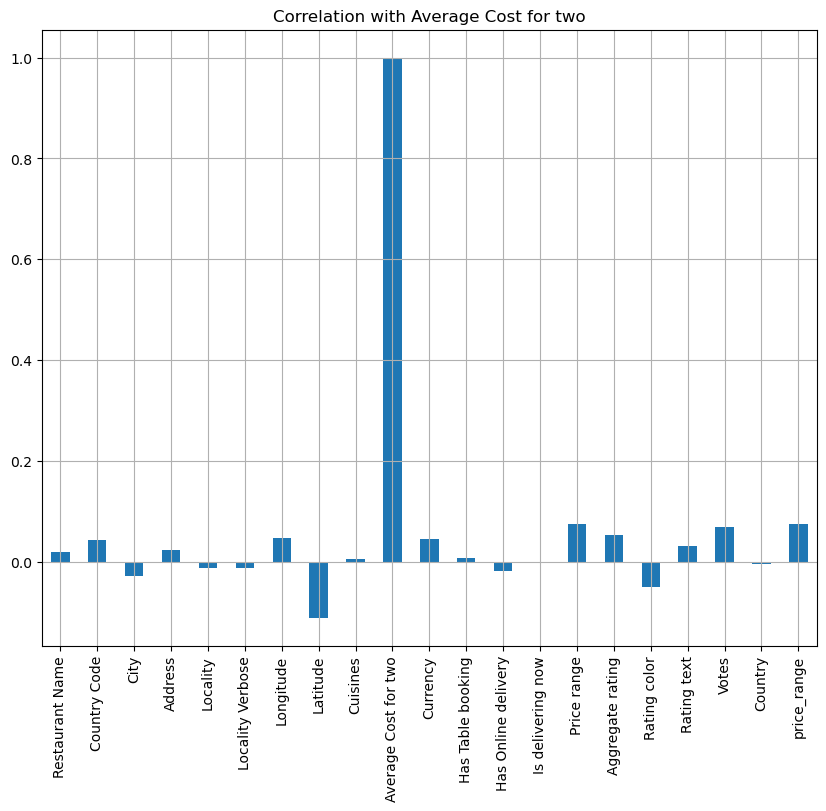

In [65]:
#Let's check the impact of each feature on the label(Primary fuel)
data.drop('Average_cost_for_two', axis=1).corrwith(data.Average_cost_for_two).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Average Cost for two')
plt.show()

In [17]:
data.corr()["Average_cost_for_two"].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
price_range             0.075083
Price range             0.075083
Average Cost for two    1.000000
Average_cost_for_two    1.000000
Name: Average_cost_for_two, dtype: float64

Country and Is delivering now are least contributors for determining the label Average Cost for two.

In [90]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,price_range,Average_cost_for_two
0,3749,162,73,8685,171,172,121.027535,14.565443,920,1100,...,0,0,3,4.8,0,1,314,6,3,1100
1,3173,162,73,6055,593,601,121.014101,14.553708,1111,1200,...,0,0,3,4.5,0,1,591,6,3,1200
2,2897,162,75,4684,308,314,121.056831,14.581404,1671,4000,...,0,0,4,4.4,1,5,270,6,4,4000
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,...,0,0,4,4.9,0,1,365,6,4,1500
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,...,0,0,4,4.8,0,1,229,6,4,1500


In [16]:
#Dropping irrelevant/correlated columns
data.drop(columns=['price_range','Average_cost_for_two','Locality Verbose', 'Is delivering now','Country'], axis=1, inplace=True)

In [17]:
data.shape

(9551, 17)

In [18]:
#Handling outliers
from scipy.stats import zscore


In [19]:
z=np.abs(zscore(data))
abs_z_score=np.abs(z)
filt_ent=(abs_z_score<3.2).all(axis=1)
data=data[filt_ent]

In [20]:
data.shape

(8482, 17)

In [21]:
data.skew()

Restaurant Name          0.046849
Country Code            20.073699
City                    -1.449615
Address                 -0.127627
Locality                -0.314789
Longitude               -3.703602
Latitude                -3.236023
Cuisines                -0.348719
Average Cost for two     3.706228
Currency               -18.106681
Has Table booking        2.270227
Has Online delivery      0.987939
Price range              1.044603
Aggregate rating        -0.870195
Rating color             0.099068
Rating text              0.426409
Votes                    3.892436
dtype: float64

In [22]:
list1=['Votes']
list2=['City','Longitude','Latitude']

In [23]:
for i in list1:
    data[i]=np.sqrt(data[i])

In [24]:
for i in list2:
    data[i]=(data[i]**2)

In [25]:
data['Currency']=(data['Currency']**3)

In [26]:
data['Country Code']=np.log(data['Country Code'])

In [27]:
data.skew()

Restaurant Name          0.046849
Country Code            20.028551
City                    -0.568058
Address                 -0.127627
Locality                -0.314789
Longitude               -2.650103
Latitude                -2.909907
Cuisines                -0.348719
Average Cost for two     3.706228
Currency                 0.105888
Has Table booking        2.270227
Has Online delivery      0.987939
Price range              1.044603
Aggregate rating        -0.870195
Rating color             0.099068
Rating text              0.426409
Votes                    1.699565
dtype: float64

In [28]:
data1=data

In [29]:
data1

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
544,5897,5.214936,13924,123,106,10786.900597,1.645219,515,300,8,0,0,4,3.4,2,0,5.830952
545,1829,5.214936,13924,1068,107,10786.779580,1.652451,102,270,8,0,0,4,4.0,1,5,5.744563
546,5319,5.214936,13924,2208,159,10782.820406,1.636915,922,500,8,0,0,4,3.8,5,2,5.744563
547,5006,5.214936,13924,1986,188,10783.092179,1.639688,6,80,8,0,0,4,3.1,2,0,5.830952
548,3189,5.214936,13924,1071,200,10785.571230,1.672420,916,430,8,0,0,4,3.8,5,2,5.916080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,3364,0.000000,17956,7066,994,0.000000,0.000000,465,400,64,0,0,2,3.7,5,2,9.219544
9273,4988,0.000000,17956,7009,994,6941.436106,313.982080,322,600,64,0,0,2,4.3,1,5,13.114877
9274,7201,0.000000,17956,8664,1081,6945.028901,314.040291,88,1500,64,0,0,4,3.8,5,2,8.602325
9275,2384,0.000000,17956,151,1169,6941.379505,314.038074,1031,1400,64,0,0,3,4.4,1,5,17.776389


In [30]:
#Separating features and label for Classification model-
X=data.drop(columns=['Price range'], axis=1)
y=data['Price range']

In [31]:
y

544     4
545     4
546     4
547     4
548     4
       ..
9272    2
9273    2
9274    4
9275    3
9312    3
Name: Price range, Length: 8482, dtype: int64

In [32]:
#Separating features and label for regression model
U=data1.drop(columns=['Average Cost for two'], axis=1)
v=data1['Average Cost for two']

In [33]:
v

544      300
545      270
546      500
547       80
548      430
        ... 
9272     400
9273     600
9274    1500
9275    1400
9312      50
Name: Average Cost for two, Length: 8482, dtype: int64

In [34]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
X_scaled=scaler.fit_transform(X)

In [36]:
X_scaled

array([[ 1.05563298, 20.11177237,  2.88928547, ..., -0.77634533,
        -1.01567114, -0.14705582],
       [-0.84434968, 20.11177237,  2.88928547, ..., -1.50036523,
         2.09755617, -0.15948058],
       [ 0.78567477, 20.11177237,  2.88928547, ...,  1.39571439,
         0.22961978, -0.15948058],
       ...,
       [ 1.66467363, -0.04981745,  4.51941083, ...,  1.39571439,
         0.22961978,  0.25153132],
       [-0.58513376, -0.04981745,  4.51941083, ..., -1.50036523,
         2.09755617,  1.57097236],
       [ 1.70437337, 19.27002632, -2.70739741, ..., -1.50036523,
         2.09755617, -0.18490823]])

In [37]:
U_scaled=scaler.fit_transform(U)

In [38]:
U_scaled

array([[ 1.05563298, 20.11177237,  2.88928547, ..., -0.77634533,
        -1.01567114, -0.14705582],
       [-0.84434968, 20.11177237,  2.88928547, ..., -1.50036523,
         2.09755617, -0.15948058],
       [ 0.78567477, 20.11177237,  2.88928547, ...,  1.39571439,
         0.22961978, -0.15948058],
       ...,
       [ 1.66467363, -0.04981745,  4.51941083, ...,  1.39571439,
         0.22961978,  0.25153132],
       [-0.58513376, -0.04981745,  4.51941083, ..., -1.50036523,
         2.09755617,  1.57097236],
       [ 1.70437337, 19.27002632, -2.70739741, ..., -1.50036523,
         2.09755617, -0.18490823]])

In [39]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split


In [40]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.30, random_state=50)

In [41]:
y_train

1745    1
4549    1
1387    1
8763    2
7917    3
       ..
9053    2
7000    1
9115    1
7040    2
6379    1
Name: Price range, Length: 5937, dtype: int64

In [42]:
U_train, U_test, v_train, v_test=train_test_split(U_scaled, v, test_size=0.30, random_state=65)

In [43]:
v_train

778      450
8162    3500
9234     600
7703    1000
8799     300
        ... 
4168     300
3527     100
976      400
1266     700
8773     400
Name: Average Cost for two, Length: 5937, dtype: int64

Model Building for Classification model

In [69]:
#Writing one function to call it for multiple models

def metric_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(X_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")

In [70]:
#Using Random Forest Classifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
metric_score(rf,X_train, X_test, y_train, y_test, train=True)
metric_score(rf,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:98.59%


In [203]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [204]:
for k in range(3,6):
    cv_score=cross_val_score(rf,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.9743015296526872


 at 4, cross val score is 0.9687616756958715


 at 5, cross val score is 0.9667606403086468




In [205]:
#Using K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [206]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [207]:
metric_score(knn,X_train, X_test, y_train, y_test, train=True)
metric_score(knn,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:82.38%

---------------Test Result-------------
Accuracy Score:74.42%


In [208]:
for k in range(3,6):
    cv_score=cross_val_score(knn,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7095017033665568


 at 4, cross val score is 0.607433526371505


 at 5, cross val score is 0.6732145239657108




In [209]:
#Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [210]:
gbdt.fit(X_train,y_train)

GradientBoostingClassifier()

In [211]:
metric_score(gbdt,X_train, X_test, y_train, y_test, train=True)
metric_score(gbdt,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:99.97%

---------------Test Result-------------
Accuracy Score:98.66%


In [212]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.9008698118283202


 at 4, cross val score is 0.8533683826603685


 at 5, cross val score is 0.9011164263239234




In [217]:
#Using SVC
from sklearn.svm import SVC
svc=SVC()

In [218]:
svc.fit(X_train,y_train)

SVC()

In [219]:
metric_score(svc,X_train, X_test, y_train, y_test, train=True)
metric_score(svc,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:95.92%

---------------Test Result-------------
Accuracy Score:93.36%


In [220]:
for k in range(3,6):
    cv_score=cross_val_score(svc,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7737671627084888


 at 4, cross val score is 0.727564594397445


 at 5, cross val score is 0.7965297389399717




We are getting one of the best accuracy score 98.47% from Random Forest Classifier model. The cross validation score at cv=3 is 97.43% which is a great score and proves that the model is generalized(isn't overfitted or underfitted).
Gradient Boosting classifier model has the highest accuracy score of 98.66% however, the CV score at CV=5 is 90.11%.
We can conclude that Random Forest Classifier model is the best fitted model as it works great on test data.

In [57]:
#Let's use hyperperameter tuning technique to stabilize model and to generalize it for unseen data.
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid={'n_estimators': [20,50,100],
            'max_depth':[20,30,40],
            'max_leaf_nodes':[30,45,50],
            'criterion':['gini','entropy']
            }

In [74]:
gridsearch=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

In [75]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'max_leaf_nodes': [30, 45, 50],
                         'n_estimators': [20, 50, 100]})

In [76]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_leaf_nodes': 45,
 'n_estimators': 50}

In [77]:
Final_model=RandomForestClassifier(criterion='entropy', max_depth= 30,max_leaf_nodes=45,n_estimators=50)

In [78]:
Final_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_leaf_nodes=45,
                       n_estimators=50)

In [79]:
pred=Final_model.predict(X_test)

In [81]:
acc=accuracy_score(y_test,pred)
print(acc*100)

97.76031434184675


After tuning the parameters, we are still getting 97.76% as accuracy score which implies that this is a generalized model that will work well on unseen data

In [82]:
#Predicting Price range
y_pred = Final_model.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'RF predicted': y_pred})

In [83]:
data1

,Actual,RF predicted
6529,4,4
2988,2,2
5170,2,2
1027,2,2
9152,3,2
...,...,...
6906,2,2
4283,2,2
4321,4,4
4901,1,1


In [48]:
#Importing libraries for regression model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [50]:
reg.fit(U_train,v_train)

LinearRegression()

In [51]:
pred_train=reg.predict(U_train)
pred_test=reg.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train)}")
print(f" testing accuracy is {r2_score(v_test,pred_test)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.7526834798566152
 testing accuracy is 0.7093936942353959
Mean Absolute Error Score: 169.995441845559


In [226]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(reg,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.6687846285517387


 at 4, cross val score is 0.6705491195742287


 at 5, cross val score is 0.7004611393967676




In [228]:
#Using Grandient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [229]:
gbr.fit(U_train,v_train)

GradientBoostingRegressor()

In [230]:
pred_train1=gbr.predict(U_train)
pred_test1=gbr.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train1)}")
print(f" testing accuracy is {r2_score(v_test,pred_test1)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test1)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.9150527007074158
 testing accuracy is 0.8601131214018594
Mean Absolute Error Score: 115.62088294643968


In [231]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(gbr,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7920037384706942


 at 4, cross val score is 0.8093542118920962


 at 5, cross val score is 0.8291004595765955




In [52]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [53]:
rfr.fit(U_train,v_train)

RandomForestRegressor()

In [54]:
pred_train2=rfr.predict(U_train)
pred_test2=rfr.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train2)}")
print(f" testing accuracy is {r2_score(v_test,pred_test2)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test2)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.9824562605403196
 testing accuracy is 0.8575463742445553
Mean Absolute Error Score: 108.58632612966599


In [235]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(rfr,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8159036148236769


 at 4, cross val score is 0.8124563810260972


 at 5, cross val score is 0.8379297799258953




In [236]:
#Using SVR
from sklearn.svm import SVR
svr=SVR()

In [237]:
svr.fit(U_train,v_train)

SVR()

In [240]:
pred_train3=svr.predict(U_train)
pred_test3=svr.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train3)}")
print(f" testing accuracy is {r2_score(v_test,pred_test3)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test3)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.27458185726994133
 testing accuracy is 0.2558977577721536
Mean Absolute Error Score: 233.47467636291188


In [239]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(rfr,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8041355131709671


 at 4, cross val score is 0.8132418254384011


 at 5, cross val score is 0.8396921329236479




We can see that Random Forest Regressor model works best on test data and Mean absolute score is the lowest. We are getting r2 score of 85.4% with this model and Mean Absolute Error score of 109. At CV=5, we are getting 83% accuracy when actual test score is 85.4% and MAE is 109. 

Gradient Boosting Regressor is giving the best r2-score of 86% however, MAE is 115 which is higher than  Random Forest Regressor model and CV score at CV=5 is 82% which is again lower than Random Forest Regressor model.

Hence, Random Forest Regressor model seems to be the best model and we will move ahead with this.

In [58]:
param_grid={'n_estimators': [50,100],
            'max_depth':[20,30,40],
            'max_leaf_nodes':[30,45,50],
            'criterion':['squared_error', 'absolute_error', 'friedman_mse']
            }

In [59]:
gridsearch=GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

In [60]:
gridsearch.fit(U_train,v_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [20, 30, 40],
                         'max_leaf_nodes': [30, 45, 50],
                         'n_estimators': [50, 100]})

In [61]:
gridsearch.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_leaf_nodes': 50,
 'n_estimators': 50}

In [62]:
Final_model=RandomForestRegressor(criterion='squared_error',max_depth= 20,max_leaf_nodes=50,n_estimators=50)

In [63]:
Final_model.fit(U_train,v_train)

RandomForestRegressor(max_depth=20, max_leaf_nodes=50, n_estimators=50)

In [64]:
pred1=Final_model.predict(U_test)

In [65]:
r2=r2_score(v_test,pred1)
print(r2*100)


84.99775769764348


After tuning the parameters, we are still getting 84.9% as accuracy score which implies that this is a generalized model that will work well on unseen data

In [67]:
#Predicting primary fuel
v_pred = Final_model.predict(U_test)
data2 = pd.DataFrame({'Actual' : v_test, 'RFR predicted': v_pred})

In [68]:
data2

,Actual,RFR predicted
3536,350,322.329281
4549,250,222.706974
7602,200,225.826488
6266,550,604.210110
8987,700,602.140503
...,...,...
3347,700,604.210110
1870,650,604.210110
6157,200,261.671301
7573,150,218.878849
